In [1]:
# importing the library
from scipy.spatial import distance

# defining the points
point_1 = (1, 2, 3)
point_2 = (4, 5, 6)
point_1, point_2

((1, 2, 3), (4, 5, 6))

In [2]:
# computing the euclidean distance
euclidean_distance = distance.euclidean(point_1, point_2)
print('Euclidean Distance b/w', point_1, 'and', point_2, 'is: ', euclidean_distance)

Euclidean Distance b/w (1, 2, 3) and (4, 5, 6) is:  5.196152422706632


In [3]:
# computing the manhattan distance
manhattan_distance = distance.cityblock(point_1, point_2)
print('Manhattan Distance b/w', point_1, 'and', point_2, 'is: ', manhattan_distance)


#distance.minkowski

Manhattan Distance b/w (1, 2, 3) and (4, 5, 6) is:  9


In [9]:
# computing the minkowski distance

minkowski_distance = distance.minkowski(point_1, point_2, p = 1)
print('Minkowski Distance b/w', point_1, 'and', point_2, 'is: ', minkowski_distance)

Minkowski Distance b/w (1, 2, 3) and (4, 5, 6) is:  9.0


In [10]:
# computing the hamming distance

hamming_distance = distance.hamming(point_1, point_2)
print('Hamming Distance b/w', point_1, 'and', point_2, 'is: ', hamming_distance)

Hamming Distance b/w (1, 2, 3) and (4, 5, 6) is:  1.0


<p style = "color:dodgerblue">The numpy random seed is a numerical value that generates a new set or repeats pseudo-random numbers. The value in the numpy random seed saves the state of randomness. If we call the seed function using value 1 multiple times, the computer displays the same random numbers.</p>

In [11]:
import numpy as np
import pandas as pd 
import scipy.stats as stats

#create dataframe with three columns 'A', 'B', 'C'
np.random.seed(10)
#data = pd.DataFrame(np.random.randint(0, 10, size=(100, 3)), columns=['A', 'B', 'C'])

col_names = ['A', 'B','C']

data = pd.DataFrame(np.random.randint(0, 10, size=(100, 3)), columns=col_names)

#view first 10 rows 


#data.head(10)
#pd.DataFrame(data=)
data.head()

,A,B,C
0,9,4,0
1,1,9,0
2,1,8,9
3,0,8,6
4,4,3,0


In [16]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(data))
#z =stats.zscore(data)

#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
#only keep rows in dataframe with all z-scores less than absolute value of 3 
#(np.where(z < -3) and np.where( z > 3))

data_clean = data[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
# data_clean.shape

print(data_clean)


#print(z.min())
#print(z.max())

    A  B  C
0   9  4  0
1   1  9  0
2   1  8  9
3   0  8  6
4   4  3  0
.. .. .. ..
95  9  4  9
96  0  1  7
97  9  3  0
98  8  1  5
99  4  5  4

[100 rows x 3 columns]


In [17]:
#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
# data_clean.shape
print(Q1)
print('-'*100)
print(Q3)
print('-'*100)
print(IQR)
print('-'*100)
data_clean.shape

A    2.0
B    2.0
C    1.0
Name: 0.25, dtype: float64
----------------------------------------------------------------------------------------------------
A    8.0
B    7.0
C    7.0
Name: 0.75, dtype: float64
----------------------------------------------------------------------------------------------------
A    6.0
B    5.0
C    6.0
dtype: float64
----------------------------------------------------------------------------------------------------


(100, 3)

**one sample t-test**

``Suppose a botanist wants to know if the mean height of a certain species of plant is equal to 15 inches. She collects a random sample of 12 plants and records each of their heights in inches.``

In [18]:
data = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]
import scipy.stats as stats

#perform one sample t-test
stats.ttest_1samp(a=data, popmean=15)

Ttest_1sampResult(statistic=-1.6848470783484626, pvalue=0.12014460742498101)

``The two hypotheses for this particular one sample t-test are as follows:``

``H0: µ = 15 (the mean height for this species of plant is 15 inches)``

``HA: µ ≠15 (the mean height is not 15 inches)``

**Because the p-value of our test (0.1201) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height for this particular species of plant is different from 15 inches.**

In [21]:
import numpy as np
import pandas as pd
columns =  ['ID','Age', 'BMI','Risk Factor']

Dictionary = {'ID':[1,2,3,4],'Age':[48,43,39,41], 'BMI':[10.3, 20.9, 18.1, 19.5], 'Risk Factor':[4, np.nan,3, np.nan]}

df =  pd.DataFrame(data=Dictionary)
df

,ID,Age,BMI,Risk Factor
0,1,48,10.3,4.0
1,2,43,20.9,NaN
2,3,39,18.1,3.0
3,4,41,19.5,NaN


In [20]:
cols = list(df.columns)
cols.remove('ID')
df[cols]


,Age,BMI,Risk Factor
0,48,10.3,4.0
1,43,20.9,NaN
2,39,18.1,3.0
3,41,19.5,NaN


In [22]:
df.drop('ID', inplace = True, axis = 1)

In [23]:
df

,Age,BMI,Risk Factor
0,48,10.3,4.0
1,43,20.9,NaN
2,39,18.1,3.0
3,41,19.5,NaN


In [24]:
# now iterate over the remaining columns and create a new zscore column
#for each column logic
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
    
# Delta Degrees of Freedom (ddof)
df

,Age,BMI,Risk Factor,Age_zscore,BMI_zscore,Risk Factor_zscore
0,48,10.3,4.0,1.569614,-1.680928,1.0
1,43,20.9,NaN,0.074744,0.901367,NaN
2,39,18.1,3.0,-1.121153,0.219251,-1.0
3,41,19.5,NaN,-0.523205,0.560309,NaN


In [29]:
from scipy import stats
import numpy as np
import pandas as pd


Dictionary = {'ID':[1,2,3,4],'Age':[48,43,39,41], 'BMI':[10.3, 20.9, 18.1, 19.5], 'Risk Factor':[4, np.nan,3, np.nan]}

df_1 =  pd.DataFrame(data=Dictionary)
df_1.drop(columns=['ID'], axis=1, inplace=True)
print(df_1)
#for the entire dataset
#axis  = None --> calculates mean and std deviation for the entire dataset  and calculates corresponding z scores
zscore_data = stats.zscore(df_1, axis=0,nan_policy='omit', ddof=0)
pd.DataFrame(data=zscore_data, columns=['Age_zscore','BMI_zscore','Risk_Factor_zscore' ]) 

   Age   BMI  Risk Factor
0   48  10.3          4.0
1   43  20.9          NaN
2   39  18.1          3.0
3   41  19.5          NaN


,Age_zscore,BMI_zscore,Risk_Factor_zscore
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN


In [30]:
Dictionary = {'ID':[1,2,3,4],'Age':[48,43,39,41], 'BMI':[10.3, 20.9, 18.1, 19.5], 'Risk Factor':[4, np.nan,3, np.nan]}

df1 =  pd.DataFrame(data=Dictionary)

#dropping id
df1.drop(columns=['ID'], axis=1, inplace=True)

#for the entire dataset
#axis  = 0 --> calculates mean and std deviation columnwise and calculates correponding zscore for each value
zscore_data = stats.zscore(df1, axis=0, nan_policy='omit', ddof=0)
pd.DataFrame(data=zscore_data, columns=['Age_zscore','BMI_zscore','Risk_Factor_zscore' ]) 

,Age_zscore,BMI_zscore,Risk_Factor_zscore
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN


In [31]:
Dictionary = {'ID':[1,2,3,4],'Age':[48,43,39,41], 'BMI':[10.3, 20.9, 18.1, 19.5], 'Risk Factor':[4, np.nan,3, np.nan]}

df1 =  pd.DataFrame(data=Dictionary)

#dropping id 
df1.drop(columns=['ID'], axis=1, inplace=True)

#for the entire dataset
#axis  = 1 --> calculates mean and std deviation for row wise and calculates correponding zscore for each value
zscore_data = stats.zscore(df1, axis=1, nan_policy='omit', ddof=0)
pd.DataFrame(data=zscore_data, columns=['Age_zscore','BMI_zscore','Risk_Factor_zscore' ]) 

,Age_zscore,BMI_zscore,Risk_Factor_zscore
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN


**finding correlations**

In [32]:
import pandas as pd
import numpy as np


data = pd.DataFrame(np.random.randint(0, 10, size=(5, 3)), columns=['A', 'B', 'C'])
data.corr()

,A,B,C
A,1.000000,-0.065767,0.889297
B,-0.065767,1.000000,0.090388
C,0.889297,0.090388,1.000000


**Generate a Normal Distribution in Python**
``where:
loc: Mean of the distribution. Default is 0.
scale: Standard deviation of the distribution. Default is 1.
size: Sample size.``

In [33]:
np.random.normal(loc=0.0, scale=1.0, size=None)

-0.7342880591208398

In [34]:
from numpy.random import seed
from numpy.random import normal

#make this example reproducible
seed(1)

#generate sample of 200 values that follow a normal distribution 
data = normal(loc=0, scale=1, size=200)
data

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
        0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
        0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
       -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       -0.07557171,  1.13162939,  1.51981682,  2.18557541, -1.39

In [35]:
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='Density'>

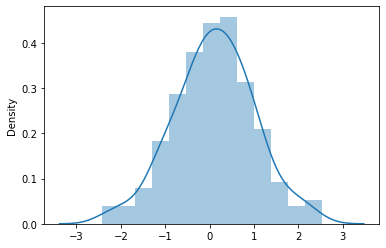

In [38]:
sns.distplot(data)  #visualize data


**Normality Test**
<br>
**scipy.stats.normaltest(a, axis=0, nan_policy='propagate')**
<br>
**Test whether a sample differs from a normal distribution.**

<br>
<br>

**p <= alpha: reject H0, not normal.
<br>
p > alpha: fail to reject H0, normal**

In [39]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# seed the random number generator
seed(1)
# generate univariate observations

data = 5 * randn(100) + 50

# normality test
stat, p = normaltest(data)

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


### How to Remove Outliers in Python

**An outlier is an observation that lies abnormally far away from other values in a dataset. Outliers can be problematic because they can affect the results of an analysis.**

**1. Use the interquartile range.**
<br>
**The interquartile range (IQR) is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) in a dataset. It measures the spread of the middle 50% of values.**
<br>
        ``Outliers = Observations > Q3 + 1.5*IQR  or  Q1 – 1.5*IQR``
        
<br>

**2.z-scores.**

A z-score tells you how many standard deviations a given value is from the mean. We use the following formula to calculate a z-score:

``z = (X – μ) / σ``

where:

X is a single raw data value
μ is the population mean
σ is the population standard deviation

**You could define an observation to be an outlier if it has a z-score less than -3 or greater than 3.**

``Outliers = Observations with z-scores > 3 or < -3``

In [40]:
import numpy as np
import pandas as pd 
import scipy.stats as stats

#create dataframe with three columns 'A', 'B', 'C'
np.random.seed(10)
data = pd.DataFrame(np.random.randint(0, 10, size=(100, 3)), columns=['A', 'B', 'C'])

#view first 10 rows 
data[:10]

,A,B,C
0,9,4,0
1,1,9,0
2,1,8,9
3,0,8,6
4,4,3,0
5,4,6,8
6,1,8,4
7,1,3,6
8,5,3,9
9,6,9,1


In [41]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(data))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = data[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(100, 3)

In [42]:
#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(100, 3)

<h1 style = "color:orange;"> Normality Test</h1>

In statistics, normality tests are used to check if the data is drawn from a Gaussian distribution or in simple if a variable or in sample has a normal distribution.

There are two ways to test normality:

1. Graphs for Normality test
2. Statistical Tests for Normality

<h1 style = "color:cyan"> 1. Graphs for Normality test </h1>

Various graphs can be used to test the normality of a variable. Using graphs/plots we can visually see the normality but graphs are not very accurate as statistical methods.

<h1 style = "color:OrangeRed;"> 1.Q Q or Quantile-Quantile Plot </h1>

It plots two sets of quantiles against one another i.e. theoretical quantiles against the actual quantiles of the variable.



In [44]:
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats

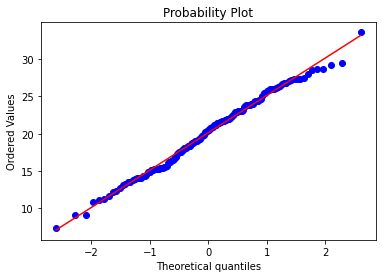

In [45]:
measurements = np.random.normal(loc = 20, scale = 5, size = 150)

stats.probplot(measurements, dist = "norm", plot = pylab)
pylab.show()

If our data comes from a normal distribution, we should see all the points sitting on the straight line.

<h1 style = "color:OrangeRed;"> 2. Box Plot </h1>

<h1 style = "color : cyan">Method 1: Create a Histogram </h1>

(array([110., 307., 247., 168.,  84.,  37.,  28.,  10.,   3.,   3.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.59044299,  1.54462417,  2.49880535,  3.45298653,  4.40716771,
         5.36134889,  6.31553007,  7.26971125,  8.22389243,  9.17807361,
        10.13225479, 11.08643597, 12.04061715, 12.99479833, 13.94897951,
        14.90316069, 15.85734187, 16.81152305, 17.76570423, 18.71988542,
        19.6740666 ]),
 <BarContainer object of 20 artists>)

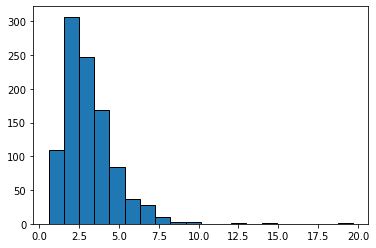

In [47]:
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create histogram to visualize values in dataset
plt.hist(lognorm_dataset, edgecolor='black', bins=20)

<h1 style = "color : cyan">Method 2: Create a Q-Q plot</h1>

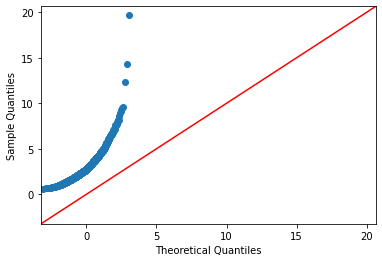

In [48]:
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(lognorm_dataset, line='45')

plt.show()

If the points on the plot fall roughly along a straight diagonal line, then we typically assume a dataset is normally distributed.

However, the points on this plot clearly don’t fall along the red line, so we would not assume that this dataset is normally distributed.

This should make sense considering we generated the data using a log-normal distribution function.

<h1 style = "color : cyan"> Method 3: Perform a Shapiro-Wilk Test </h1>

In [51]:
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Shapiro-Wilk test for normality
print(shapiro(lognorm_dataset))

# ShapiroResult(statistic=0.8573324680328369, pvalue=3.880663073872444e-29)

ShapiroResult(statistic=0.8573324680328369, pvalue=3.880663073872444e-29)


From the output we can see that the test statistic is 0.857 and the corresponding p-value is 3.88e-29 (extremely close to zero).

Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.

This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

<h1 style = "color : cyan">Method 4: Perform a Kolmogorov-Smirnov Test</h1>

In [52]:
import math
import numpy as np
from scipy.stats import kstest
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Kolmogorov-Smirnov test for normality
print(kstest(lognorm_dataset, 'norm'))

# KstestResult(statistic=0.84125708308077, pvalue=0.0)

KstestResult(statistic=0.84125708308077, pvalue=0.0)


From the output we can see that the test statistic is 0.841 and the corresponding p-value is 0.0.

Since the p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.

This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

<h1 style = "color:SpringGreen">How to Handle Non-Normal Data</h1>
If a given dataset is not normally distributed, we can often perform one of the following transformations to make it more normally distributed:



1. Log Transformation: Transform the values from x to log(x).

2. Square Root Transformation: Transform the values from x to √x.

3. Cube Root Transformation: Transform the values from x to x1/3.

By performing these transformations, the dataset typically becomes more normally distributed.